# TAZ Summaries
This notebook imports TAZ data from the SFCTA in order to create a map to explore origin and destinations in SF.

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
from geopandas import GeoDataFrame
pd.set_option('max_columns', 800)

import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
pylab.rcParams['figure.figsize'] = 10, 8

# magic command to display matplotlib plots inline within the ipython notebook
%matplotlib inline

In [2]:
file_path = "../Data/dist16/trips_2012_dist16.csv"

In [3]:
df = pd.read_csv(file_path)

In [4]:
#cannot convert to float because there are problems with transit as an origin district for the following districts: N.Beach/Chinatown, Western Market, Mission/Portrero
df['vol'] = df['vol'].astype(float)

In [5]:
#df.head()

In [6]:
#df[(df['odist']==1) and (df['mode']=='bike') and (df['tp']=='am')]
#df[(df['mode']=='bike') & (df['odist']==2) & (df['tp']=='am')]

# Step 1
Create dataset of destinations by origin district by mode, time, and desination district.

In [7]:
data = df[['odist', 'ddist', 'mode', 'tp', 'vol']]

In [8]:
#create id field, a combination of mode, destination district, and time period. Necessary for reshape.
data['name'] = data['mode']+"_"+data['tp']+"_"+data['ddist'].astype(str)

/Users/briangoggin/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [9]:
data = data[['odist', 'name', 'vol']]

In [10]:
data.head()

,odist,name,vol
0,1,bike_am_1,668.750
1,1,bike_ea_1,53.375
2,1,bike_ev_1,456.000
3,1,bike_md_1,1021.250
4,1,bike_pm_1,859.500


In [11]:
#reshape to wide format
data = data.pivot(index='odist',columns='name', values='vol')

In [12]:
#replace nans with 0s. I assume this means that there are no estimated trips.
data.fillna(value = 0, axis = 1, inplace = True)

In [13]:
data.head()

name,bike_am_1,bike_am_10,bike_am_11,bike_am_12,bike_am_13,bike_am_14,bike_am_15,bike_am_16,bike_am_2,bike_am_3,bike_am_4,bike_am_5,bike_am_6,bike_am_7,bike_am_8,bike_am_9,bike_ea_1,bike_ea_10,bike_ea_11,bike_ea_12,bike_ea_13,bike_ea_14,bike_ea_15,bike_ea_16,bike_ea_2,bike_ea_3,bike_ea_4,bike_ea_5,bike_ea_6,bike_ea_7,bike_ea_8,bike_ea_9,bike_ev_1,bike_ev_10,bike_ev_11,bike_ev_12,bike_ev_13,bike_ev_14,bike_ev_15,bike_ev_16,bike_ev_2,bike_ev_3,bike_ev_4,bike_ev_5,bike_ev_6,bike_ev_7,bike_ev_8,bike_ev_9,bike_md_1,bike_md_10,bike_md_11,bike_md_12,bike_md_13,bike_md_14,bike_md_15,bike_md_16,bike_md_2,bike_md_3,bike_md_4,bike_md_5,bike_md_6,bike_md_7,bike_md_8,bike_md_9,bike_pm_1,bike_pm_10,bike_pm_11,bike_pm_12,bike_pm_13,bike_pm_14,bike_pm_15,bike_pm_16,bike_pm_2,bike_pm_3,bike_pm_4,bike_pm_5,bike_pm_6,bike_pm_7,bike_pm_8,bike_pm_9,drive_alone_am_1,drive_alone_am_10,drive_alone_am_11,drive_alone_am_12,drive_alone_am_13,drive_alone_am_14,drive_alone_am_15,drive_alone_am_16,drive_alone_am_17,drive_alone_am_2,drive_alone_am_3,drive_alone_am_4,drive_alone_am_5,drive_alone_am_6,drive_alone_am_7,drive_alone_am_8,drive_alone_am_9,drive_alone_ea_1,drive_alone_ea_10,drive_alone_ea_11,drive_alone_ea_12,drive_alone_ea_13,drive_alone_ea_14,drive_alone_ea_15,drive_alone_ea_16,drive_alone_ea_17,drive_alone_ea_2,drive_alone_ea_3,drive_alone_ea_4,drive_alone_ea_5,drive_alone_ea_6,drive_alone_ea_7,drive_alone_ea_8,drive_alone_ea_9,drive_alone_ev_1,drive_alone_ev_10,drive_alone_ev_11,drive_alone_ev_12,drive_alone_ev_13,drive_alone_ev_14,drive_alone_ev_15,drive_alone_ev_16,drive_alone_ev_17,drive_alone_ev_2,drive_alone_ev_3,drive_alone_ev_4,drive_alone_ev_5,drive_alone_ev_6,drive_alone_ev_7,drive_alone_ev_8,drive_alone_ev_9,drive_alone_md_1,drive_alone_md_10,drive_alone_md_11,drive_alone_md_12,drive_alone_md_13,drive_alone_md_14,drive_alone_md_15,drive_alone_md_16,drive_alone_md_17,drive_alone_md_2,drive_alone_md_3,drive_alone_md_4,drive_alone_md_5,drive_alone_md_6,drive_alone_md_7,drive_alone_md_8,drive_alone_md_9,drive_alone_pm_1,drive_alone_pm_10,drive_alone_pm_11,drive_alone_pm_12,drive_alone_pm_13,drive_alone_pm_14,drive_alone_pm_15,drive_alone_pm_16,drive_alone_pm_17,drive_alone_pm_2,drive_alone_pm_3,drive_alone_pm_4,drive_alone_pm_5,drive_alone_pm_6,drive_alone_pm_7,drive_alone_pm_8,drive_alone_pm_9,shared_ride_2_am_1,shared_ride_2_am_10,shared_ride_2_am_11,shared_ride_2_am_12,shared_ride_2_am_13,shared_ride_2_am_14,shared_ride_2_am_15,shared_ride_2_am_16,shared_ride_2_am_17,shared_ride_2_am_2,shared_ride_2_am_3,shared_ride_2_am_4,shared_ride_2_am_5,shared_ride_2_am_6,shared_ride_2_am_7,shared_ride_2_am_8,shared_ride_2_am_9,shared_ride_2_ea_1,shared_ride_2_ea_10,shared_ride_2_ea_11,shared_ride_2_ea_12,shared_ride_2_ea_13,shared_ride_2_ea_14,shared_ride_2_ea_15,shared_ride_2_ea_16,shared_ride_2_ea_17,shared_ride_2_ea_2,shared_ride_2_ea_3,shared_ride_2_ea_4,shared_ride_2_ea_5,shared_ride_2_ea_6,shared_ride_2_ea_7,shared_ride_2_ea_8,shared_ride_2_ea_9,shared_ride_2_ev_1,shared_ride_2_ev_10,shared_ride_2_ev_11,shared_ride_2_ev_12,shared_ride_2_ev_13,shared_ride_2_ev_14,shared_ride_2_ev_15,shared_ride_2_ev_16,shared_ride_2_ev_17,shared_ride_2_ev_2,shared_ride_2_ev_3,shared_ride_2_ev_4,shared_ride_2_ev_5,shared_ride_2_ev_6,shared_ride_2_ev_7,shared_ride_2_ev_8,shared_ride_2_ev_9,shared_ride_2_md_1,shared_ride_2_md_10,shared_ride_2_md_11,shared_ride_2_md_12,shared_ride_2_md_13,shared_ride_2_md_14,shared_ride_2_md_15,shared_ride_2_md_16,shared_ride_2_md_17,shared_ride_2_md_2,shared_ride_2_md_3,shared_ride_2_md_4,shared_ride_2_md_5,shared_ride_2_md_6,shared_ride_2_md_7,shared_ride_2_md_8,shared_ride_2_md_9,shared_ride_2_pm_1,shared_ride_2_pm_10,shared_ride_2_pm_11,shared_ride_2_pm_12,shared_ride_2_pm_13,shared_ride_2_pm_14,shared_ride_2_pm_15,shared_ride_2_pm_16,shared_ride_2_pm_17,shared_ride_2_pm_2,shared_ride_2_pm_3,shared_ride_2_pm_4,shared_ride_2_pm_5,shared_ride_2_pm_6,shared_ride_2_pm_7,shared_ride_2_pm_8,shared_ride_2_pm_9,shared_ride_3_am_1,s

In [14]:
#Create mode-time totals
#round all numbers to the hundredth place
times = ['am', 'ea', 'ev', 'md', 'pm']
modes = ['bike', 'drive_alone', 'shared_ride_2', 'shared_ride_3', 'taxi', 'transit', 'truck', 'walk']
numbers = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17']

In [15]:
#fill out columns for all modes and times to make sure they have 1-17. If not, make column of 0s.
for t in times:
    for m in modes:
        for n in numbers:
            if m+'_'+t+'_'+n not in data:
                data[m+'_'+t+'_'+n]= 0 #fill out with 0s if this column does not exist

In [16]:
#Create all and drive categories (sums of other categories)

#first, all category
for t in times:
    for n in numbers:
        data['all'+'_'+t+'_'+n] = 0
        for m in modes:
            data['all'+'_'+t+'_'+n]+=data[m+'_'+t+'_'+n]

drivemodes=['drive_alone', 'shared_ride_2', 'shared_ride_3','taxi', 'truck']

#second, drive category
for t in times:
    for n in numbers:
        data['drive'+'_'+t+'_'+n] = 0
        for m in drivemodes:
            data['drive'+'_'+t+'_'+n]+=data[m+'_'+t+'_'+n]


In [17]:
#add 'all' and 'drive' categories to mode list
modes = ['all', 'drive', 'bike', 'drive_alone', 'shared_ride_2', 'shared_ride_3', 'taxi', 'transit', 'truck', 'walk']

#create sum columns for mode and times
for t in times:
    for m in modes:
        data[m+'_'+t]=data[m+'_'+t+'_'+'1']+data[m+'_'+t+'_'+'2']+data[m+'_'+t+'_'+'3']+data[m+'_'+t+'_'+'4']+data[m+'_'+t+'_'+'5']+data[m+'_'+t+'_'+'6']+data[m+'_'+t+'_'+'7']+data[m+'_'+t+'_'+'8']+data[m+'_'+t+'_'+'9']+data[m+'_'+t+'_'+'10']+data[m+'_'+t+'_'+'11']+data[m+'_'+t+'_'+'12']+data[m+'_'+t+'_'+'13']+data[m+'_'+t+'_'+'14']+data[m+'_'+t+'_'+'15']+data[m+'_'+t+'_'+'16']+data[m+'_'+t+'_'+'17']

In [19]:
#create percentage of all mode-time trips for each origin
for t in times:
    for m in modes:
        data[m+'_'+t+'_'+'pct']=(data[m+'_'+t]/data[m+'_'+t].sum())*100

In [22]:
#create columns for percentages of each mode-time trips for each destination district
#fill out columns for all modes and times to make sure they have 1-17. If not, make column of 0s.
for t in times:
    for m in modes:
        for n in numbers:
            data[m+'_'+t+'_'+n+'_'+'pct']=(data[m+'_'+t+'_'+n]/data[m+'_'+t])*100

In [25]:
#check to make sure math is correct
data[['drive_am', 'drive_am_1', 'drive_am_1_pct']]

name,drive_am,drive_am_1,drive_am_1_pct
odist,,,
1,3.105671e+04,9238.209918,29.746257
2,1.084124e+04,2569.510980,23.701262
3,1.737667e+04,5209.737430,29.981216
4,2.112551e+04,2788.877538,13.201467
5,1.979664e+04,2510.156562,12.679708
6,1.509184e+04,1028.223288,6.813110
7,1.919114e+04,3367.601934,17.547692
8,1.752608e+04,1860.574244,10.616030
9,2.111784e+04,1867.968904,8.845455


In [26]:
data.shape

(17, 1800)

In [27]:
#finally, drop all person-trip columns. All we want is percentages for final geojson.
for t in times:
    for m in modes:
        for n in numbers:
            data.drop(m+'_'+t+'_'+n, axis=1, inplace=True)
            
for t in times:
    for m in modes:
        data.drop(m+'_'+t, axis=1, inplace=True)

In [28]:
data.shape

(17, 900)

# Step 2.
Create percentage of total person trips in each district-time period

In [305]:
dfo = df.groupby(['odist', 'mode', 'tp'], as_index=False)['vol'].agg('sum')

In [306]:
totals = df.groupby(['odist', 'tp'], as_index=False)['vol'].agg('sum')

In [307]:
totals.head()

,odist,tp,vol
0,1,am,73395.672303
1,1,ea,10327.643763
2,1,ev,162004.277697
3,1,md,324170.331372
4,1,pm,202331.013688


In [308]:
#created merged dataframe
merged = dfo.merge(totals, how='inner', left_on=['odist', 'tp'], right_on=['odist', 'tp'])

In [309]:
merged.head(30)

,odist,mode,tp,vol_x,vol_y
0,1,bike,am,2024.250000,73395.672303
1,1,drive_alone,am,11976.172850,73395.672303
2,1,shared_ride_2,am,1322.792442,73395.672303
3,1,shared_ride_3,am,435.153621,73395.672303
4,1,taxi,am,594.125000,73395.672303
5,1,transit,am,13853.576664,73395.672303
6,1,truck,am,16728.470000,73395.672303
7,1,walk,am,26461.131726,73395.672303
8,1,bike,ea,141.500000,10327.643763
9,1,drive_alone,ea,829.743639,10327.643763


In [310]:
merged['name']=merged['mode']+"_"+merged['tp']

In [311]:
merged['pct']=(merged['vol_x']/merged['vol_y'])*100

In [312]:
#reshape to wide format
data2 = merged.pivot(index='odist',columns='name', values='pct')

# Step 3.
Import Shapefile of Districts

In [313]:
filepath = "../Data/dist16/Dist_16_Dissolve.shp"
TAZs = gpd.read_file(filepath)

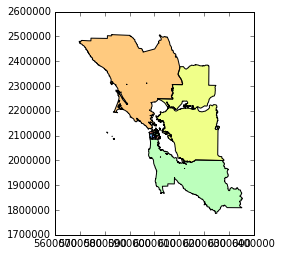

In [314]:
#TAZs.crs = {'init' :'epsg:4326'} #set projection
TAZs.plot()

In [315]:
TAZs.head()

,DIST,DISTNAME,FULLNAME,OBJECTID,Shape_Area,Shape_Leng,geometry
0,1.0,Downtown,Downtown,1,3.482649e+07,33926.595772,"POLYGON ((6014725.000174835 2118354.749827594,..."
1,2.0,SoMa,SoMa,2,3.980157e+07,80130.281802,(POLYGON ((6032225.627903178 2114620.192008004...
2,3.0,N.Beach/,N. Beach/Chinatown,3,4.764233e+07,91608.410582,(POLYGON ((6009991.000128418 2122816.000747591...
3,4.0,Western,Western Market,4,8.104781e+07,44643.613030,"POLYGON ((6006487.000574753 2114077.000509083,..."
4,5.0,Mission/,Mission/Potrero,5,1.095278e+08,89862.310635,"POLYGON ((6014737.500149846 2110230.75098376, ..."


# Step 4. 
Merge and Export

In [316]:
final = TAZs.merge(data2, how='inner', left_on=['DIST'], right_index=True) #merge mode percentages from step 2. 

In [317]:
final.shape

(16, 47)

In [318]:
final = final.merge(data, how='inner', left_on=['DIST'], right_index=True) #merge destination percentages from step 1.

In [319]:
final.shape

(16, 767)

In [320]:
final.head()

,DIST,DISTNAME,FULLNAME,OBJECTID,Shape_Area,Shape_Leng,geometry,bike_am,bike_ea,bike_ev,bike_md,bike_pm,drive_alone_am,drive_alone_ea,drive_alone_ev,drive_alone_md,drive_alone_pm,shared_ride_2_am,shared_ride_2_ea,shared_ride_2_ev,shared_ride_2_md,shared_ride_2_pm,shared_ride_3_am,shared_ride_3_ea,shared_ride_3_ev,shared_ride_3_md,shared_ride_3_pm,taxi_am,taxi_ea,taxi_ev,taxi_md,taxi_pm,transit_am,transit_ea,transit_ev,transit_md,transit_pm,truck_am,truck_ea,truck_ev,truck_md,truck_pm,walk_am,walk_ea,walk_ev,walk_md,walk_pm,bike_am_pct,drive_alone_am_pct,shared_ride_2_am_pct,shared_ride_3_am_pct,taxi_am_pct,transit_am_pct,truck_am_pct,walk_am_pct,bike_ea_pct,drive_alone_ea_pct,shared_ride_2_ea_pct,shared_ride_3_ea_pct,taxi_ea_pct,transit_ea_pct,truck_ea_pct,walk_ea_pct,bike_ev_pct,drive_alone_ev_pct,shared_ride_2_ev_pct,shared_ride_3_ev_pct,taxi_ev_pct,transit_ev_pct,truck_ev_pct,walk_ev_pct,bike_md_pct,drive_alone_md_pct,shared_ride_2_md_pct,shared_ride_3_md_pct,taxi_md_pct,transit_md_pct,truck_md_pct,walk_md_pct,bike_pm_pct,drive_alone_pm_pct,shared_ride_2_pm_pct,shared_ride_3_pm_pct,taxi_pm_pct,transit_pm_pct,truck_pm_pct,walk_pm_pct,bike_am_1_pct,bike_am_2_pct,bike_am_3_pct,bike_am_4_pct,bike_am_5_pct,bike_am_6_pct,bike_am_7_pct,bike_am_8_pct,bike_am_9_pct,bike_am_10_pct,bike_am_11_pct,bike_am_12_pct,bike_am_13_pct,bike_am_14_pct,bike_am_15_pct,bike_am_16_pct,bike_am_17_pct,drive_alone_am_1_pct,drive_alone_am_2_pct,drive_alone_am_3_pct,drive_alone_am_4_pct,drive_alone_am_5_pct,drive_alone_am_6_pct,drive_alone_am_7_pct,drive_alone_am_8_pct,drive_alone_am_9_pct,drive_alone_am_10_pct,drive_alone_am_11_pct,drive_alone_am_12_pct,drive_alone_am_13_pct,drive_alone_am_14_pct,drive_alone_am_15_pct,drive_alone_am_16_pct,drive_alone_am_17_pct,shared_ride_2_am_1_pct,shared_ride_2_am_2_pct,shared_ride_2_am_3_pct,shared_ride_2_am_4_pct,shared_ride_2_am_5_pct,shared_ride_2_am_6_pct,shared_ride_2_am_7_pct,shared_ride_2_am_8_pct,shared_ride_2_am_9_pct,shared_ride_2_am_10_pct,shared_ride_2_am_11_pct,shared_ride_2_am_12_pct,shared_ride_2_am_13_pct,shared_ride_2_am_14_pct,shared_ride_2_am_15_pct,shared_ride_2_am_16_pct,shared_ride_2_am_17_pct,shared_ride_3_am_1_pct,shared_ride_3_am_2_pct,shared_ride_3_am_3_pct,shared_ride_3_am_4_pct,shared_ride_3_am_5_pct,shared_ride_3_am_6_pct,shared_ride_3_am_7_pct,shared_ride_3_am_8_pct,shared_ride_3_am_9_pct,shared_ride_3_am_10_pct,shared_ride_3_am_11_pct,shared_ride_3_am_12_pct,shared_ride_3_am_13_pct,shared_ride_3_am_14_pct,shared_ride_3_am_15_pct,shared_ride_3_am_16_pct,shared_ride_3_am_17_pct,taxi_am_1_pct,taxi_am_2_pct,taxi_am_3_pct,taxi_am_4_pct,taxi_am_5_pct,taxi_am_6_pct,taxi_am_7_pct,taxi_am_8_pct,taxi_am_9_pct,taxi_am_10_pct,taxi_am_11_pct,taxi_am_12_pct,taxi_am_13_pct,taxi_am_14_pct,taxi_am_15_pct,taxi_am_16_pct,taxi_am_17_pct,transit_am_1_pct,transit_am_2_pct,transit_am_3_pct,transit_am_4_pct,transit_am_5_pct,transit_am_6_pct,transit_am_7_pct,transit_am_8_pct,transit_am_9_pct,transit_am_10_pct,transit_am_11_pct,transit_am_12_pct,transit_am_13_pct,transit_am_14_pct,transit_am_15_pct,transit_am_16_pct,transit_am_17_pct,truck_am_1_pct,truck_am_2_pct,truck_am_3_pct,truck_am_4_pct,truck_am_5_pct,truck_am_6_pct,truck_am_7_pct,truck_am_8_pct,truck_am_9_pct,truck_am_10_pct,truck_am_11_pct,truck_am_12_pct,truck_am_13_pct,truck_am_14_pct,truck_am_15_pct,truck_am_16_pct,truck_am_17_pct,walk_am_1_pct,walk_am_2_pct,walk_am_3_pct,walk_am_4_pct,walk_am_5_pct,walk_am_6_pct,walk_am_7_pct,walk_am_8_pct,walk_am_9_pct,walk_am_10_pct,walk_am_11_pct,walk_am_12_pct,walk_am_13_pct,walk_am_14_pct,walk_am_15_pct,walk_am_16_pct,walk_am_17_pct,bike_ea_1_pct,bike_ea_2_pct,bike_ea_3_pct,bike_ea_4_pct,bike_ea_5_pct,bike_ea_6_pct,bike_ea_7_pct,bike_ea_8_pct,bike_ea_9_pct,bike_ea_10_pct,bike_ea_11_pct,bike_ea_12_pct,bike_ea_13_pct,bike_ea_14_pct,bike_ea_15_pct,bike_ea_16_pct,bike_ea_17_pct,drive_alone_ea_1_pct,drive_alone_ea_2_pct,drive_alone_ea_3_pct,drive_alone_ea_4_pct,drive_alone_ea_5_pct,drive_alone_ea_6_pct,drive_alone_e

In [321]:
final = final.to_crs({'init': 'epsg:4326'}) 

In [322]:
#round all percentages to the nearest integer
for t in times:
    for m in modes:
        final[m+'_'+t] = round(final[m+'_'+t], 0)
        final[m+'_'+t+'_'+'pct'] = round(final[m+'_'+t+'_'+'pct'], 0)
        
for t in times:
    for m in modes:
        for n in numbers:
            final[m+'_'+t+'_'+n+'_'+'pct'] = round(final[m+'_'+t+'_'+n+'_'+'pct'], 0)

In [333]:
final.head(17)

,DIST,FULLNAME,OBJECTID,Shape_Area,Shape_Leng,geometry,bike_am,bike_ea,bike_ev,bike_md,bike_pm,drive_alone_am,drive_alone_ea,drive_alone_ev,drive_alone_md,drive_alone_pm,shared_ride_2_am,shared_ride_2_ea,shared_ride_2_ev,shared_ride_2_md,shared_ride_2_pm,shared_ride_3_am,shared_ride_3_ea,shared_ride_3_ev,shared_ride_3_md,shared_ride_3_pm,taxi_am,taxi_ea,taxi_ev,taxi_md,taxi_pm,transit_am,transit_ea,transit_ev,transit_md,transit_pm,truck_am,truck_ea,truck_ev,truck_md,truck_pm,walk_am,walk_ea,walk_ev,walk_md,walk_pm,bike_am_pct,drive_alone_am_pct,shared_ride_2_am_pct,shared_ride_3_am_pct,taxi_am_pct,transit_am_pct,truck_am_pct,walk_am_pct,bike_ea_pct,drive_alone_ea_pct,shared_ride_2_ea_pct,shared_ride_3_ea_pct,taxi_ea_pct,transit_ea_pct,truck_ea_pct,walk_ea_pct,bike_ev_pct,drive_alone_ev_pct,shared_ride_2_ev_pct,shared_ride_3_ev_pct,taxi_ev_pct,transit_ev_pct,truck_ev_pct,walk_ev_pct,bike_md_pct,drive_alone_md_pct,shared_ride_2_md_pct,shared_ride_3_md_pct,taxi_md_pct,transit_md_pct,truck_md_pct,walk_md_pct,bike_pm_pct,drive_alone_pm_pct,shared_ride_2_pm_pct,shared_ride_3_pm_pct,taxi_pm_pct,transit_pm_pct,truck_pm_pct,walk_pm_pct,bike_am_1_pct,bike_am_2_pct,bike_am_3_pct,bike_am_4_pct,bike_am_5_pct,bike_am_6_pct,bike_am_7_pct,bike_am_8_pct,bike_am_9_pct,bike_am_10_pct,bike_am_11_pct,bike_am_12_pct,bike_am_13_pct,bike_am_14_pct,bike_am_15_pct,bike_am_16_pct,bike_am_17_pct,drive_alone_am_1_pct,drive_alone_am_2_pct,drive_alone_am_3_pct,drive_alone_am_4_pct,drive_alone_am_5_pct,drive_alone_am_6_pct,drive_alone_am_7_pct,drive_alone_am_8_pct,drive_alone_am_9_pct,drive_alone_am_10_pct,drive_alone_am_11_pct,drive_alone_am_12_pct,drive_alone_am_13_pct,drive_alone_am_14_pct,drive_alone_am_15_pct,drive_alone_am_16_pct,drive_alone_am_17_pct,shared_ride_2_am_1_pct,shared_ride_2_am_2_pct,shared_ride_2_am_3_pct,shared_ride_2_am_4_pct,shared_ride_2_am_5_pct,shared_ride_2_am_6_pct,shared_ride_2_am_7_pct,shared_ride_2_am_8_pct,shared_ride_2_am_9_pct,shared_ride_2_am_10_pct,shared_ride_2_am_11_pct,shared_ride_2_am_12_pct,shared_ride_2_am_13_pct,shared_ride_2_am_14_pct,shared_ride_2_am_15_pct,shared_ride_2_am_16_pct,shared_ride_2_am_17_pct,shared_ride_3_am_1_pct,shared_ride_3_am_2_pct,shared_ride_3_am_3_pct,shared_ride_3_am_4_pct,shared_ride_3_am_5_pct,shared_ride_3_am_6_pct,shared_ride_3_am_7_pct,shared_ride_3_am_8_pct,shared_ride_3_am_9_pct,shared_ride_3_am_10_pct,shared_ride_3_am_11_pct,shared_ride_3_am_12_pct,shared_ride_3_am_13_pct,shared_ride_3_am_14_pct,shared_ride_3_am_15_pct,shared_ride_3_am_16_pct,shared_ride_3_am_17_pct,taxi_am_1_pct,taxi_am_2_pct,taxi_am_3_pct,taxi_am_4_pct,taxi_am_5_pct,taxi_am_6_pct,taxi_am_7_pct,taxi_am_8_pct,taxi_am_9_pct,taxi_am_10_pct,taxi_am_11_pct,taxi_am_12_pct,taxi_am_13_pct,taxi_am_14_pct,taxi_am_15_pct,taxi_am_16_pct,taxi_am_17_pct,transit_am_1_pct,transit_am_2_pct,transit_am_3_pct,transit_am_4_pct,transit_am_5_pct,transit_am_6_pct,transit_am_7_pct,transit_am_8_pct,transit_am_9_pct,transit_am_10_pct,transit_am_11_pct,transit_am_12_pct,transit_am_13_pct,transit_am_14_pct,transit_am_15_pct,transit_am_16_pct,transit_am_17_pct,truck_am_1_pct,truck_am_2_pct,truck_am_3_pct,truck_am_4_pct,truck_am_5_pct,truck_am_6_pct,truck_am_7_pct,truck_am_8_pct,truck_am_9_pct,truck_am_10_pct,truck_am_11_pct,truck_am_12_pct,truck_am_13_pct,truck_am_14_pct,truck_am_15_pct,truck_am_16_pct,truck_am_17_pct,walk_am_1_pct,walk_am_2_pct,walk_am_3_pct,walk_am_4_pct,walk_am_5_pct,walk_am_6_pct,walk_am_7_pct,walk_am_8_pct,walk_am_9_pct,walk_am_10_pct,walk_am_11_pct,walk_am_12_pct,walk_am_13_pct,walk_am_14_pct,walk_am_15_pct,walk_am_16_pct,walk_am_17_pct,bike_ea_1_pct,bike_ea_2_pct,bike_ea_3_pct,bike_ea_4_pct,bike_ea_5_pct,bike_ea_6_pct,bike_ea_7_pct,bike_ea_8_pct,bike_ea_9_pct,bike_ea_10_pct,bike_ea_11_pct,bike_ea_12_pct,bike_ea_13_pct,bike_ea_14_pct,bike_ea_15_pct,bike_ea_16_pct,bike_ea_17_pct,drive_alone_ea_1_pct,drive_alone_ea_2_pct,drive_alone_ea_3_pct,drive_alone_ea_4_pct,drive_alone_ea_5_pct,drive_alone_ea_6_pct,drive_alone_ea_7_pct,d

In [332]:
final[['bike_am_pct', 'drive_alone_am_pct', 'FULLNAME']].head(17)

,bike_am_pct,drive_alone_am_pct,FULLNAME
0,2.0,1.0,Downtown
1,1.0,0.0,SoMa
2,2.0,0.0,N. Beach/Chinatown
3,4.0,1.0,Western Market
4,4.0,0.0,Mission/Potrero
5,2.0,0.0,Noe/Glen/Bernal
6,3.0,0.0,Marina/N. Heights
7,3.0,1.0,Richmond
8,1.0,1.0,Bayshore
9,1.0,1.0,Outer Mission


In [324]:
#finally, drop unnecessary column
final.drop('DISTNAME', axis=1, inplace=True)

In [325]:
export_path = "../TAZ_Map/"
with open(export_path+'taz_output.js', 'w') as f:
    f.write('var dataset = {};'.format(final.to_json()))